This project is about text mining and applying machine learning classifying algorithms. Throughout the entire project, we will:

- Scrape reviews of American Airlines, Lufthansa and China Southern Airlines from tripadvsor.com

- Apply regular text mining procedures including: Lemmatization, Tokenization, etc,..

- Extract polarity score from the clean texts and create a time series graph to compare their services throughout the years.

- Develop a classifying model for positive and negative reviews.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import lxml
from selenium import webdriver
import time
import re

In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:69.0) Gecko/20100101 Firefox/69.0'}

options = webdriver.FirefoxOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')

airline_name = ['AA', 'Lufthansa', 'China_Southern_Airlines']

urls = ["https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or{}-American-Airlines.html",
        "https://www.tripadvisor.com/Airline_Review-d8729113-Reviews-or{}-Lufthansa.html",
        "https://www.tripadvisor.com/Airline_Review-d8729051-Reviews-or{}-China-Southern-Airlines.html"]

def getdata(url, name)
    titles = []
    reviews = []
    date_of_review = []
    date_of_travel = []
    locations = []
    destinations = []
    class_=[]
    number_of_reviews = []
    ratings = []
    for i in range(0, 525, 5):
        driver = webdriver.Firefox(executable_path = '/usr/local/bin/geckodriver', options=options)
        driver.get(url.format(i))
        time.sleep(3)
        page_source = driver.page_source
        bs = BeautifulSoup(page_source, 'lxml')

        for idx, r in enumerate(bs.find_all('div', {'class': 'location-review-review-list-parts-SingleReview__reviewContainer--N7DSv'})):
            titles.append(r.find('div', {'class': 'location-review-review-list-parts-ReviewTitle__reviewTitle--2GO9Z'}).get_text())

            reviews.append(r.find('div', {'class': 'location-review-review-list-parts-ExpandableReview__containerStyles--1G0AE'}).text.split("Read more")[0])

            date_of_review.append(r.find('div', {'class': "social-member-event-MemberEventOnObjectBlock__event_type--3njyv"}).text.split("review")[-1])

            if r.find('div', {'class': 'location-review-review-list-parts-EventDate__event_date--1epHa'}) is not None:
                date_of_travel.append(r.find('div', {'class': 'location-review-review-list-parts-EventDate__event_date--1epHa'}).text.split(": ")[1])
            else:
                date_of_travel.append('NA')
                
            location = r.find('div', {'class': "social-member-MemberHeaderStats__event_info--30wFs"}).text
            num = re.findall(r"\d+", location)[0]
            locations.append(location.split(num)[0])

            destinations.append(r.find('div', {'class': "location-review-review-list-parts-RatingLine__labelBtn--e58BL"}).text)

            des = r.find('div', {'class': "location-review-review-list-parts-RatingLine__labelsContainer--rSajH"}).text
            cap = re.findall(r"Economy|Business Class|First Class|Premium Economy", des)[0]
            cap1 = cap.strip('')
            class_.append(cap1)

            number_of_reviews.append(r.find('span', {'class': 'social-member-MemberHeaderStats__bold--3z3qh'}).text)

            ratings.append(int(r.find('span', 'ui_bubble_rating')['class'][1].split('_')[1])/10)

    data = {'titles': titles,
            'reviews': reviews,
            'date_of_review': date_of_review,
            'date_of_travel': date_of_travel,
            'locations': locations,
            'destinations': destinations,
            'class': class_,
            'number_of_reviews': number_of_reviews,
            'ratings': ratings}
    df = pd.DataFrame(data)
    df.to_csv(['{}.csv'.format(name)])
    
getdata("https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or{}-American-Airlines.html", "AA")
getdata("https://www.tripadvisor.com/Airline_Review-d8729113-Reviews-or{}-Lufthansa.html", 'Lufthansa')
getdata("https://www.tripadvisor.com/Airline_Review-d8729051-Reviews-or{}-China-Southern-Airlines.html", 
       "China_Southern_Airlines")

In [2]:
aa = pd.read_csv('AA.csv', sep = ',', engine = 'python')
aa.drop('Unnamed: 0', axis = 1, inplace=True)
aa['text'] = aa['titles'] + " " + aa['reviews']
aa.head()

,titles,reviews,date_of_review,date_of_travel,locations,destinations,class,number_of_reviews,ratings,text
0,A real mixed bag,we had a round trip airfare that was just fine...,Oct 9,19-Aug,"Green Valley, Arizona",Tucson - Washington DC,Economy,228,3,A real mixed bag we had a round trip airfare t...
1,Great flight!,Our flight was on time and the flight very com...,Oct 9,19-Sep,"Lenoir, North Carolina",Charlotte - Bangor,Economy,83,5,Great flight! Our flight was on time and the f...
2,Very good flights,Had a very good flight and the flight attendan...,Oct 9,19-Sep,"Navarre, Florida",Pensacola - Charlotte,Economy,180,4,Very good flights Had a very good flight and t...
3,Poor performance!,"For starters, our flight to Aruba was cancelle...",Oct 9,19-Sep,NaN,Spokane - Aruba,Premium Economy,4,2,"Poor performance! For starters, our flight to ..."
4,Onboard baggage,I found out quickly what basic economy is. It ...,Oct 9,19-Sep,"Kemah, Texas",Houston - Fort Myers,Economy,3,1,Onboard baggage I found out quickly what basic...


In [3]:
# Show only bad reviews
# aa[(aa['ratings'] == 1) | (aa['ratings'] == 2)]

In [4]:
lufthansa = pd.read_csv('Lufthansa.csv', sep = ',', engine = 'python')
lufthansa.drop('Unnamed: 0', axis=1, inplace=True)
lufthansa['text'] = lufthansa['titles'] + " " + lufthansa['reviews']
lufthansa.head()

,titles,reviews,date_of_review,date_of_travel,locations,destinations,class,number_of_reviews,ratings,text
0,Cabin crew great so called connection flights ...,Just flew Lufthansa LHR via FRA to VCE. All fo...,Oct 7,19-Oct,london uk,London - Venice,Economy,326,1,Cabin crew great so called connection flights ...
1,Extremely tight seating,I rated a 2 only because the staff and service...,Oct 7,19-Sep,"Toronto, Canada",Toronto - Munich,Economy,23,2,Extremely tight seating I rated a 2 only becau...
2,Time flies with Lufthansa,We had a round-trip flight from New York JFK t...,Oct 7,19-Sep,NaN,New York City - Naples,Economy,1,5,Time flies with Lufthansa We had a round-trip ...
3,First Lufthansa experience,Lufthansa were good - I had heard a lot about ...,Oct 7,19-Sep,NaN,Manchester - Nairobi,Economy,14,4,First Lufthansa experience Lufthansa were good...
4,A very good experience,Planes are new and clean. Staff are friendly...,Oct 7,19-Oct,NaN,Munich - Toronto,Business Class,105,5,A very good experience Planes are new and cle...


In [5]:
csa = pd.read_csv('China_Southern_Airlines.csv', sep = ',', engine = 'python')
csa.drop('Unnamed: 0', axis = 1, inplace=True)
csa['text'] = csa['titles'] + " " + csa['reviews']
csa.head()

,titles,reviews,date_of_review,date_of_travel,locations,destinations,class,number_of_reviews,ratings,text
0,Good airline especially for the price but Chin...,China Southern is a great airline for the pric...,Sep 2019,19-Sep,"Granite Falls, North Carolina",New York City - Bangkok,Business Class,22,4,Good airline especially for the price but Chin...
1,Broke my LCD TV and didn't pay me,"I sent 50"" inch LCD TV from San Francisco to K...",Sep 2019,19-May,NaN,San Francisco - Kathmandu,Economy,3,1,"Broke my LCD TV and didn't pay me I sent 50"" i..."
2,"The CZ378, MEX-YVR-CAN",This flight was part of my trip from MEX to DE...,Sep 2019,19-May,NaN,Mexico City - Guangzhou,Economy,14,5,"The CZ378, MEX-YVR-CAN This flight was part of..."
3,Too easy,It was the bargain price of the flights with C...,Sep 2019,19-Aug,"Hamilton, New Zealand",Auckland - Beijing,Economy,11,4,Too easy It was the bargain price of the fligh...
4,Great flight,I have flown many times with China Southern Ai...,Sep 2019,19-Aug,"Perth, Australia",Perth - Guangzhou,Economy,121,4,Great flight I have flown many times with Chin...


We check if there is 0 value in the ratings column.

In [6]:
print('Number of 0 rating of AA:', sum(aa['ratings'] == 0))
print('Number of 0 rating of Lufthansa:', sum(lufthansa['ratings'] == 0))
print('Number of 0 rating of China Southern Airlines:', sum(csa['ratings'] == 0))

Number of 0 rating of AA: 0
Number of 0 rating of Lufthansa: 0
Number of 0 rating of China Southern Airlines: 0


Create another rating column for each airline dataframe

In [7]:
aa['ratings_'] = aa['ratings']
lufthansa['ratings_'] = lufthansa['ratings']
csa['ratings_'] = csa['ratings']

We are assigning positive, neutral and negative tag for each value of rating from 1 to 5

In [8]:
rating_dict = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}

df_list = [aa, lufthansa, csa]
for df in df_list:
    df['ratings_'] = df['ratings_'].map(rating_dict)

Find the numbers of each type of reviews

In [9]:
print("Proportion of AA reviews:", aa['ratings_'].value_counts()/len(aa['ratings_']))
print("Proportion of Lufthansa reviews:", lufthansa['ratings_'].value_counts()/len(lufthansa['ratings_']))
print("Proportion of CSA reviews:", csa['ratings_'].value_counts()/len(csa['ratings_']))

Proportion of AA reviews: positive    0.491429
negative    0.379048
neutral     0.129524
Name: ratings_, dtype: float64
Proportion of Lufthansa reviews: positive    0.596190
negative    0.266667
neutral     0.137143
Name: ratings_, dtype: float64
Proportion of CSA reviews: positive    0.594286
negative    0.247619
neutral     0.158095
Name: ratings_, dtype: float64


Graph the proportion of positive, neutral and negative reviews for each airline

In [10]:
def df_ratings(df, column='name'):
    r = pd.DataFrame(df['ratings_'].value_counts()/len(df['ratings_']))
    r = r.rename(columns={'ratings_': '{}'.format(column)})
    return r

aa_ratings = df_ratings(aa, column='aa')
luft_ratings = df_ratings(lufthansa, column='lufthansa')
csa_ratings = df_ratings(csa, column='csa')

full_ratings = aa_ratings.join(luft_ratings).join(csa_ratings)
tr_ratings = full_ratings.transpose()
tr_ratings = tr_ratings[['positive', 'neutral', 'negative']]
tr_ratings

,positive,neutral,negative
aa,0.491429,0.129524,0.379048
lufthansa,0.596190,0.137143,0.266667
csa,0.594286,0.158095,0.247619


([<matplotlib.axis.XTick at 0x114e7a490>,
 <a list of 3 Text xticklabel objects>)

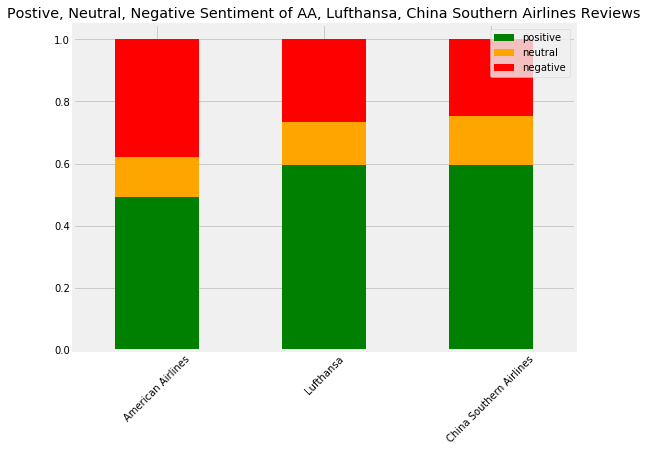

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

tr_ratings.plot.bar(stacked=True, figsize=(8, 6), color=['green', 'orange', 'red'],
                    title="Postive, Neutral, Negative Sentiment of AA, Lufthansa, China Southern Airlines Reviews").legend()
plt.xticks(np.arange(3), ('American Airlines', 'Lufthansa', 'China Southern Airlines'), rotation=45)

China Southern and Lufthansa almost have the same percentage in positive, neutral and negative reviews.

We now try to explore what words appear the most throughout customer reviews on China Southern

In [12]:
# Define a pattern and replace them 
pattern = re.compile(r"(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# function to clean reviews 
def clean_reviews(x):
    x = [pattern.sub("", line.lower()) for line in x]
    clean_text = []
    for review in x:
        #sub_list = []
        tokens = word_tokenize(review)
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
        sub_list = " ".join(tokens) 
        clean_text.append(sub_list)
    
    return clean_text

Apply clean_review function on multiple data frames

In [14]:
for df in aa, lufthansa, csa:
    df['cleantxt'] = clean_reviews(df['text'])

lufthansa.head()

,titles,reviews,date_of_review,date_of_travel,locations,destinations,class,number_of_reviews,ratings,text,ratings_,clean_reviews,cleantxt
0,Cabin crew great so called connection flights ...,Just flew Lufthansa LHR via FRA to VCE. All fo...,Oct 7,19-Oct,london uk,London - Venice,Economy,326,1,Cabin crew great so called connection flights ...,negative,cabin crew great called connection flight dont...,cabin crew great called connection flight dont...
1,Extremely tight seating,I rated a 2 only because the staff and service...,Oct 7,19-Sep,"Toronto, Canada",Toronto - Munich,Economy,23,2,Extremely tight seating I rated a 2 only becau...,negative,extremely tight seating rated 2 staff service ...,extremely tight seating rated 2 staff service ...
2,Time flies with Lufthansa,We had a round-trip flight from New York JFK t...,Oct 7,19-Sep,NaN,New York City - Naples,Economy,1,5,Time flies with Lufthansa We had a round-trip ...,positive,time fly lufthansa round-trip flight new york ...,time fly lufthansa round-trip flight new york ...
3,First Lufthansa experience,Lufthansa were good - I had heard a lot about ...,Oct 7,19-Sep,NaN,Manchester - Nairobi,Economy,14,4,First Lufthansa experience Lufthansa were good...,positive,first lufthansa experience lufthansa good - he...,first lufthansa experience lufthansa good - he...
4,A very good experience,Planes are new and clean. Staff are friendly...,Oct 7,19-Oct,NaN,Munich - Toronto,Business Class,105,5,A very good experience Planes are new and cle...,positive,good experience plane new clean staff friendly...,good experience plane new clean staff friendly...


We now will create a graph to look for the most 30 frequent words in China Southern reviews

In [15]:
from nltk import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt

# function to plot top n most frequent words
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
  
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
    # selecting top n most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    plt.grid(True)
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation = 45)
    plt.show()

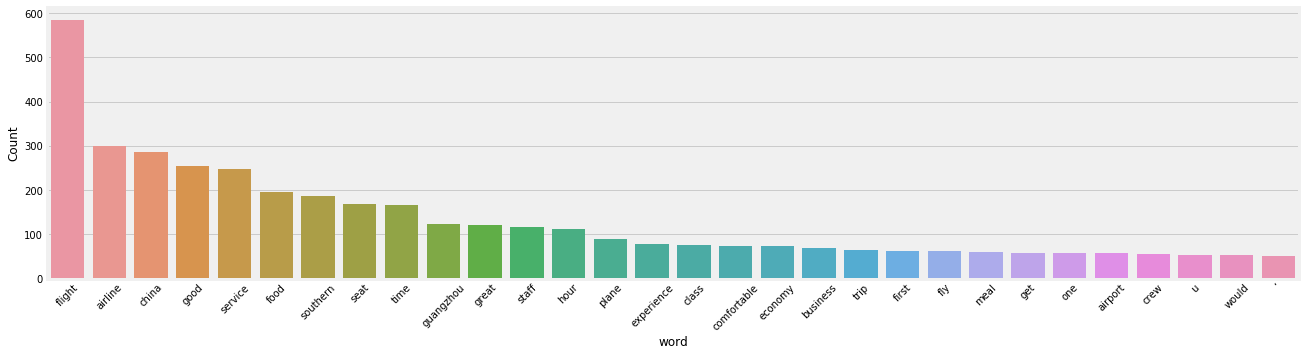

In [16]:
freq_words(csa['cleantxt'], terms = 30)

Define a function to convert data frame columns to pandas datetime

In [17]:
#aa['date_of_travel'] = aa['date_of_travel'].apply(lambda x: pd.to_datetime(x, format='{date}'.format(date = "%y-%b" if aa.date_of_travel.split("-")[0].isdigit() else date = "%b-%y")))
#s.apply(lambda x : pd.to_datetime(x, format="%d%{}%Y".format("m" if x.isdigit() else "b")))
#aa['date_of_travel']
for df in aa, lufthansa, csa:
    date_of_travel_ = []
    for i in aa.date_of_travel.values:
        if str(i).split("-")[0].isdigit():
            date_of_travel_.append(pd.to_datetime(i, format="%y-%b"))
        else:
            date_of_travel_.append(pd.to_datetime(i, format="%b-%y"))
    df['date_of_travel'] = date_of_travel_
    #df['date_of_travel'] = df['date_of_travel'].dt.to_period('M')
    
aa.head()

,titles,reviews,date_of_review,date_of_travel,locations,destinations,class,number_of_reviews,ratings,text,ratings_,clean_reviews,cleantxt
0,A real mixed bag,we had a round trip airfare that was just fine...,Oct 9,2019-08-01,"Green Valley, Arizona",Tucson - Washington DC,Economy,228,3,A real mixed bag we had a round trip airfare t...,neutral,real mixed bag round trip airfare fine going c...,real mixed bag round trip airfare fine going c...
1,Great flight!,Our flight was on time and the flight very com...,Oct 9,2019-09-01,"Lenoir, North Carolina",Charlotte - Bangor,Economy,83,5,Great flight! Our flight was on time and the f...,positive,great flight flight time flight comfortable st...,great flight flight time flight comfortable st...
2,Very good flights,Had a very good flight and the flight attendan...,Oct 9,2019-09-01,"Navarre, Florida",Pensacola - Charlotte,Economy,180,4,Very good flights Had a very good flight and t...,positive,good flight good flight flight attendant atten...,good flight good flight flight attendant atten...
3,Poor performance!,"For starters, our flight to Aruba was cancelle...",Oct 9,2019-09-01,NaN,Spokane - Aruba,Premium Economy,4,2,"Poor performance! For starters, our flight to ...",negative,poor performance starter flight aruba cancelle...,poor performance starter flight aruba cancelle...
4,Onboard baggage,I found out quickly what basic economy is. It ...,Oct 9,2019-09-01,"Kemah, Texas",Houston - Fort Myers,Economy,3,1,Onboard baggage I found out quickly what basic...,negative,onboard baggage found quickly basic economy me...,onboard baggage found quickly basic economy me...


We only need Month and Year of from the column Date of Travel 

In [18]:
for df in aa, lufthansa, csa:
    #df['mnth_yr'] = df['date_column'].apply(lambda x: x.strftime('%B-%Y')) 
    df['date_of_travel'] = df['date_of_travel'].dt.to_period('M')
lufthansa.head()

,titles,reviews,date_of_review,date_of_travel,locations,destinations,class,number_of_reviews,ratings,text,ratings_,clean_reviews,cleantxt
0,Cabin crew great so called connection flights ...,Just flew Lufthansa LHR via FRA to VCE. All fo...,Oct 7,2019-08,london uk,London - Venice,Economy,326,1,Cabin crew great so called connection flights ...,negative,cabin crew great called connection flight dont...,cabin crew great called connection flight dont...
1,Extremely tight seating,I rated a 2 only because the staff and service...,Oct 7,2019-09,"Toronto, Canada",Toronto - Munich,Economy,23,2,Extremely tight seating I rated a 2 only becau...,negative,extremely tight seating rated 2 staff service ...,extremely tight seating rated 2 staff service ...
2,Time flies with Lufthansa,We had a round-trip flight from New York JFK t...,Oct 7,2019-09,NaN,New York City - Naples,Economy,1,5,Time flies with Lufthansa We had a round-trip ...,positive,time fly lufthansa round-trip flight new york ...,time fly lufthansa round-trip flight new york ...
3,First Lufthansa experience,Lufthansa were good - I had heard a lot about ...,Oct 7,2019-09,NaN,Manchester - Nairobi,Economy,14,4,First Lufthansa experience Lufthansa were good...,positive,first lufthansa experience lufthansa good - he...,first lufthansa experience lufthansa good - he...
4,A very good experience,Planes are new and clean. Staff are friendly...,Oct 7,2019-09,NaN,Munich - Toronto,Business Class,105,5,A very good experience Planes are new and cle...,positive,good experience plane new clean staff friendly...,good experience plane new clean staff friendly...


In [19]:
aa_df = aa[['date_of_travel', 'cleantxt']]
aa_df['airline'] = "AA"

lufthansa_df = lufthansa[['date_of_travel', 'cleantxt']]
lufthansa_df['airline'] = "Lufthansa"

csa_df = csa[['date_of_travel', 'cleantxt']]
csa_df['airline'] = "China Southern"

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [20]:
aa[(aa.destinations.str.contains('New York'))]['ratings_'].value_counts()

negative    21
positive    21
neutral      5
Name: ratings_, dtype: int64

Calculate Polarity Score

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

def get_score(df):
    scores = [vader.polarity_scores(text) for text in df['cleantxt'].values]
    # Convert the list of dicts into a DataFrame
    scores_df = pd.DataFrame(scores)
    return scores_df
aa_scores = get_score(aa_df)
luft_scores = get_score(lufthansa_df)
csa_scores = get_score(csa_df)

We now join each data frame with their scores

In [22]:
aa_full = aa_df.join(aa_scores)
luft_full = lufthansa_df.join(luft_scores)
csa_full = csa_df.join(csa_scores)

In [23]:
aa_full[(aa_full['compound']==aa_full['compound'].max())]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
339,2019-08,beautiful flight transported wheelchair gate e...,AA,0.0,0.314,0.686,0.9881


In [24]:
aa_full[(aa_full['compound']==aa_full['compound'].min())]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
42,2019-07,worst airline always delayed canceling flight ...,AA,0.547,0.453,0.0,-0.9633


In [25]:
luft_full[(luft_full['compound']==luft_full['compound'].max())]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
346,2019-08,great service comfortable german efficiency be...,Lufthansa,0.0,0.273,0.727,0.9906


In [26]:
luft_full[(luft_full['compound']==luft_full['compound'].min())]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
193,2019-09,terribly ignorant arrogant staff totally unhel...,Lufthansa,0.473,0.527,0.0,-0.9622


In [27]:
csa_full[(csa_full['compound']==csa_full['compound'].max())]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
259,2019-07,great trip travelled via new airbus a380 lovel...,China Southern,0.0,0.457,0.543,0.9806


In [28]:
csa_full[(csa_full['compound']==csa_full['compound'].min())]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
398,2019-07,worst rudest # 1 rip-off airline world cheapo ...,China Southern,0.336,0.664,0.0,-0.9565


In [29]:
# Concat all data frames together
df_full = pd.concat([aa_full, luft_full, csa_full], axis=0)
df_full.head()

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
0,2019-08,real mixed bag round trip airfare fine going c...,AA,0.146,0.671,0.183,0.2960
1,2019-09,great flight flight time flight comfortable st...,AA,0.000,0.637,0.363,0.8126
2,2019-09,good flight good flight flight attendant atten...,AA,0.000,0.580,0.420,0.7003
3,2019-09,poor performance starter flight aruba cancelle...,AA,0.169,0.762,0.070,-0.4588
4,2019-09,onboard baggage found quickly basic economy me...,AA,0.136,0.864,0.000,-0.4767


In [30]:
df_full.dropna(inplace = True)
group_df = df_full.groupby(['date_of_travel', 'airline']).mean()
group_df.tail()

neg       neu       pos  compound
date_of_travel airline                                               
2019-09        China Southern  0.082512  0.655673  0.261821  0.442785
               Lufthansa       0.079080  0.646265  0.274630  0.421223
2019-10        AA              0.104394  0.688000  0.207606  0.165352
               China Southern  0.105515  0.635970  0.258515  0.395055
               Lufthansa       0.098970  0.663424  0.237636  0.310752

In [31]:
group_df_ = group_df.unstack(level=1)
group_df_.tail()

neg                                neu                 \
airline               AA China Southern Lufthansa        AA China Southern   
date_of_travel                                                               
2019-06         0.085667       0.100333  0.089778  0.609889       0.684056   
2019-07         0.117706       0.087588  0.068471  0.619147       0.665206   
2019-08         0.118789       0.093836  0.094862  0.689513       0.665198   
2019-09         0.104111       0.082512  0.079080  0.662944       0.655673   
2019-10         0.104394       0.105515  0.098970  0.688000       0.635970   

                               pos                           compound  \
airline        Lufthansa        AA China Southern Lufthansa        AA   
date_of_travel                                                          
2019-06         0.711944  0.304444       0.215611  0.198444  0.422956   
2019-07         0.686118  0.263176       0.247176  0.245500  0.314782   
2019-08         0.636642  0.191694       0.240983  0.268500  0.160006   
2019-09         0.646265  0.233000       0.261821  0.274630  0.278623   
2019-10         0.663424  0.207606       0.258515  0.237636  0.165352   

                                         
airline        China Southern Lufthansa  
date_of_travel                           
2019-06              0.317400  0.360122  
2019-07              0.376200  0.402291  
2019-08              0.359078  0.348960  
2019-09              0.442785  0.421223  
2019-10              0.395055  0.310752

In [32]:
group_df_xs = group_df_.xs('compound', axis =1)
group_df_xs.tail()

airline,AA,China Southern,Lufthansa
date_of_travel,,,
2019-06,0.422956,0.317400,0.360122
2019-07,0.314782,0.376200,0.402291
2019-08,0.160006,0.359078,0.348960
2019-09,0.278623,0.442785,0.421223
2019-10,0.165352,0.395055,0.310752


In [33]:
group_df_xs.head()

airline,AA,China Southern,Lufthansa
date_of_travel,,,
2018-09,0.9118,0.68080,-0.7783
2018-10,0.3055,0.37670,0.8776
2018-11,0.3391,0.51715,0.6901
2018-12,0.9590,0.22630,0.7152
2019-01,0.4305,0.63690,0.6249


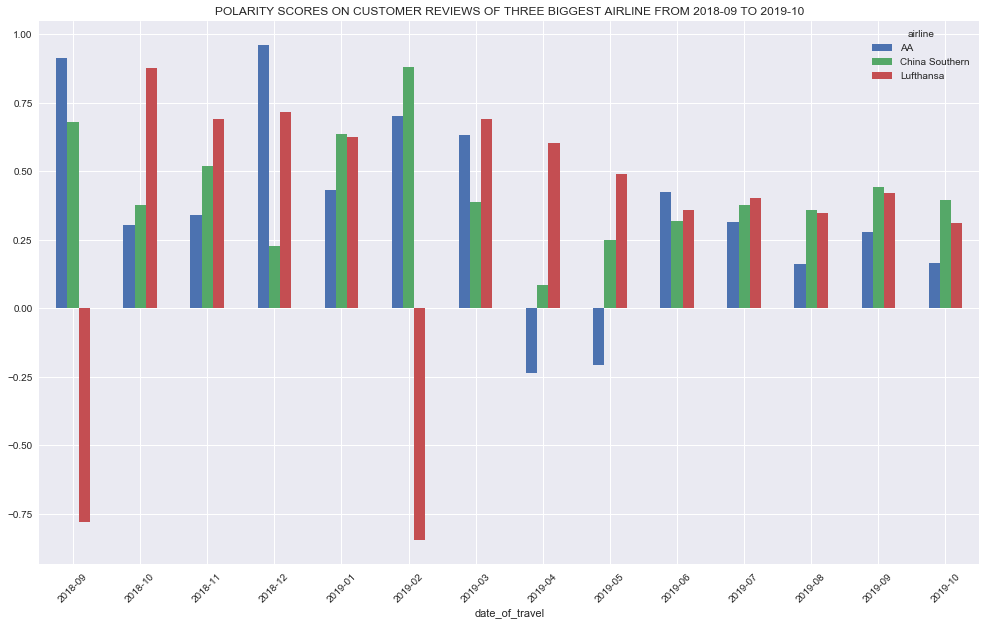

In [34]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

plot = group_df_xs.plot.bar(figsize=(15, 10), rot = 45,
                            title='POLARITY SCORES ON CUSTOMER REVIEWS OF THREE BIGGEST AIRLINE FROM 2018-09 TO 2019-10')
plot

In [35]:
aa_full[(aa_full.date_of_travel >= "2018-09") & (aa_full.date_of_travel <= "2019-03")]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
19,2019-03,typical airline travel cattle car ’ afford fir...,AA,0.157,0.843,0.000,-0.3818
31,2018-11,trip see family smooth flight stewardess profe...,AA,0.049,0.704,0.246,0.6808
38,2019-03,always superb service always travel american a...,AA,0.000,0.435,0.565,0.9360
77,2019-03,great experience / bad timing american airline...,AA,0.085,0.535,0.379,0.9200
154,2019-01,nice relaxed originally boarded someone taken ...,AA,0.174,0.577,0.249,0.4305
245,2019-02,american better flying route phl mbj every feb...,AA,0.000,0.823,0.177,0.7003
269,2018-10,great flight brilliant flight would use americ...,AA,0.123,0.506,0.371,0.9062
271,2019-03,american airline flight good flight first clas...,AA,0.000,0.580,0.420,0.9349
302,2018-10,spending time flight time connection time bagg...,AA,0.000,0.508,0.492,0.8910
309,2018-10,trip hell husband gave 900000 mile 2 rt tfirst...,AA,0.260,0.740,0.000,-0.8807


In [36]:
luft_full[(luft_full.date_of_travel >= "2018-09") & (luft_full.date_of_travel <= "2019-03")]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
19,2019-03,never take connection night flight lufthansa f...,Lufthansa,0.060,0.825,0.115,0.2960
31,2018-11,pe product beat singapore flew man-fra-hkg a34...,Lufthansa,0.000,0.818,0.182,0.7553
38,2019-03,travelled europe like beggar honeymoon checkin...,Lufthansa,0.000,0.938,0.062,0.3612
77,2019-03,amazing flight even though seat best economy c...,Lufthansa,0.000,0.691,0.309,0.9201
154,2019-01,great flight flight time option online check 2...,Lufthansa,0.000,0.843,0.157,0.6249
245,2019-02,terrible customer service booted flight overbo...,Lufthansa,0.283,0.717,0.000,-0.8439
269,2018-10,business class - buenos aire frankfurt absolut...,Lufthansa,0.068,0.680,0.252,0.8070
271,2019-03,family friendly service long flight lufthansa ...,Lufthansa,0.054,0.482,0.463,0.9513
302,2018-10,excellent service premium economy lh590 seat q...,Lufthansa,0.000,0.451,0.549,0.9600
309,2018-10,business class best comfortable seat service d...,Lufthansa,0.000,0.553,0.447,0.8658


In [37]:
csa_full[(csa_full.date_of_travel >= "2018-09") & (csa_full.date_of_travel <= "2019-03")]

,date_of_travel,cleantxt,airline,neg,neu,pos,compound
19,2019-03,smooth journey n steward stewadess polite love...,China Southern,0.000,0.738,0.262,0.8625
31,2018-11,great service china southern airline great emp...,China Southern,0.000,0.360,0.640,0.9571
38,2019-03,seriously aiming biggest world brief one infli...,China Southern,0.206,0.742,0.052,-0.5574
77,2019-03,nice flight flight delay 13 hour gave accommod...,China Southern,0.182,0.491,0.326,0.6249
154,2019-01,flyer beware c think twice flying c best yet s...,China Southern,0.000,0.870,0.130,0.6369
245,2019-02,pleased flight flight zhangjiajie dyg hanoi ha...,China Southern,0.000,0.699,0.301,0.8807
269,2018-10,professional airline flight impacted approachi...,China Southern,0.066,0.804,0.129,0.4215
271,2019-03,recommend send information ticket sell bought ...,China Southern,0.000,0.889,0.111,0.3612
302,2018-10,economy cost economy service outward journey a...,China Southern,0.175,0.691,0.134,-0.2263
309,2018-10,surprisingly good leg room legroom great fligh...,China Southern,0.041,0.553,0.406,0.9349


- Notice that there is something very interesting about this graph! All 3 airlines received extreme reviews from customers in 2018, but in 2019 they received mild reviews. The reason for this result is because our reviews data from Tripadvisor is not complete. We obtained a lot of reviews from customers in recent months such 2019-05 to 2019-09 but not in 2018.

- The more reviews and data we get, the clearer picture and consistent score we have when comparing with official ratings on Tripadvisor.

# We will now create a function to confirm polarity scores with percentage of negative, neutral and positive reviews from customers.

In [38]:
def get_sentiment(x):
    if x >= 0.1:
        return '1'
    elif x > -0.1 and x < 0.1:
        return '0'
    elif x <= -0.1:
        return '-1'

In [39]:
aa_full['polarity'] = aa_full['compound'].apply(get_sentiment)
aa_prc = aa_full.groupby('polarity').count()
aa_prc['Percentage'] = aa_prc['cleantxt']/sum(aa_prc['cleantxt'])
aa_prc

,date_of_travel,cleantxt,airline,neg,neu,pos,compound,Percentage
polarity,,,,,,,,
-1,178,185,185,185,185,185,185,0.352381
0,28,29,29,29,29,29,29,0.055238
1,298,311,311,311,311,311,311,0.592381


In [41]:
luft_full['polarity'] = luft_full['compound'].apply(get_sentiment)
luft_prc = luft_full.groupby('polarity').count()
luft_prc['Percentage'] = luft_prc['cleantxt']/sum(luft_prc['cleantxt'])
luft_prc

,date_of_travel,cleantxt,airline,neg,neu,pos,compound,Percentage
polarity,,,,,,,,
-1,130,137,137,137,137,137,137,0.260952
0,27,27,27,27,27,27,27,0.051429
1,347,361,361,361,361,361,361,0.687619


In [43]:
csa_full['polarity'] = csa_full['compound'].apply(get_sentiment)
csa_prc = csa_full.groupby('polarity').count()
csa_prc['Percentage'] = csa_prc['cleantxt']/sum(csa_prc['cleantxt'])
csa_prc

,date_of_travel,cleantxt,airline,neg,neu,pos,compound,Percentage
polarity,,,,,,,,
-1,131,141,141,141,141,141,141,0.268571
0,19,19,19,19,19,19,19,0.036190
1,354,365,365,365,365,365,365,0.695238


In [44]:
aa_prc.rename(columns={'Percentage': 'AA'}, inplace=True)
luft_prc.rename(columns={'Percentage': 'Lufthansa'}, inplace=True)
csa_prc.rename(columns={'Percentage': 'China Southern'}, inplace=True)

full_prc = aa_prc[['AA']].join(luft_prc[['Lufthansa']]).join(csa_prc[['China Southern']])
tr_prc = full_prc.transpose()
#tr_prc = tr_prc[['negative', 'neutral', 'positive']]
tr_prc.rename(columns={'-1': 'Negative', '0': 'Neutral', '1': 'Positive'}, inplace=True)
tr_prc = tr_prc[['Positive', 'Neutral', 'Negative']]
tr_prc

polarity,Positive,Neutral,Negative
AA,0.592381,0.055238,0.352381
Lufthansa,0.687619,0.051429,0.260952
China Southern,0.695238,0.036190,0.268571


([<matplotlib.axis.XTick at 0x1a1ef9a410>,
 <a list of 3 Text xticklabel objects>)

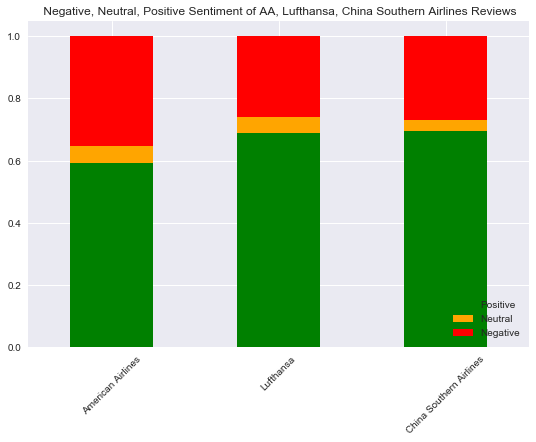

In [45]:
tr_prc.plot.bar(stacked=True, figsize=(8, 6), color=['green', 'orange', 'red'],
                    title=" Negative, Neutral, Positive Sentiment of AA, Lufthansa, China Southern Airlines Reviews").legend(loc=4)
plt.xticks(np.arange(3), ('American Airlines', 'Lufthansa', 'China Southern Airlines'), rotation=45)

# This result corresponds with the percentage of positive, neutral, negative reviews from customers.

# Now we will build a reviews classifier

First, we have to reassign value for customers ratings. Our model only accept either positive or negative reviews

In [54]:
rating_dict = {'-1': 'negative', '0': 'negative', '1': 'positive'}

#df_list = [aa, lufthansa, csa]
#for df in df_list:
    #df['ratings_'] = df['ratings'].map(rating_dict)
df_full['polarity'] = df_full['compound'].apply(get_sentiment)
df_full['ratings'] = df_full['polarity'].map(rating_dict)
df_full.head()

,date_of_travel,cleantxt,airline,neg,neu,pos,compound,polarity,ratings
0,2019-08,real mixed bag round trip airfare fine going c...,AA,0.146,0.671,0.183,0.2960,1,positive
1,2019-09,great flight flight time flight comfortable st...,AA,0.000,0.637,0.363,0.8126,1,positive
2,2019-09,good flight good flight flight attendant atten...,AA,0.000,0.580,0.420,0.7003,1,positive
3,2019-09,poor performance starter flight aruba cancelle...,AA,0.169,0.762,0.070,-0.4588,-1,negative
4,2019-09,onboard baggage found quickly basic economy me...,AA,0.136,0.864,0.000,-0.4767,-1,negative


In [55]:
df_full['ratings'].value_counts()

positive    999
negative    513
Name: ratings, dtype: int64

In [56]:
999/(999+513)

0.6607142857142857

Upsampling the data of negative instances

In [57]:
pos_df = df_full[df_full.ratings == "positive"]
neg_df = df_full[df_full.ratings == "negative"]

df = pd.concat([pos_df, neg_df.sample(df_full['ratings'].value_counts()[0], replace=True)], axis=0)
df.ratings.value_counts()

negative    999
positive    999
Name: ratings, dtype: int64

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels: y
y = df['ratings'].values
X = df['cleantxt'].values
#X_luft = lufthansa[['titles', 'reviews']].values
#X_luft = X_luft.reshape(525, 2)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english', max_features = 200,
                                   token_pattern = r'\b[^\d\W]+\b')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:100])

['aa', 'absolutely', 'agent', 'air', 'aircraft', 'airline', 'airport', 'american', 'arrived', 'asked', 'attendant', 'average', 'bad', 'bag', 'baggage', 'best', 'better', 'bit', 'board', 'boarding', 'booked', 'booking', 'business', 'cabin', 'canceled', 'cancelled', 'carry', 'change', 'changed', 'charlotte', 'check', 'checked', 'chicago', 'china', 'chinese', 'choice', 'class', 'clean', 'comfortable', 'company', 'connecting', 'connection', 'crew', 'customer', 'dallas', 'day', 'decent', 'delay', 'delayed', 'departure', 'destination', 'didnt', 'different', 'dont', 'drink', 'early', 'easy', 'economy', 'efficient', 'entertainment', 'europe', 'excellent', 'experience', 'extra', 'family', 'fine', 'flew', 'flight', 'flown', 'fly', 'flying', 'food', 'frankfurt', 'free', 'friendly', 'gate', 'getting', 'given', 'going', 'good', 'got', 'great', 'guangzhou', 'hard', 'help', 'helpful', 'home', 'horrible', 'hotel', 'hour', 'inflight', 'information', 'informed', 'international', 'issue', 'know', 'late',

# Multinomial Naive Bayes

In [60]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['negative', 'positive'])
print(cm)

0.8116666666666666
[[250  58]
 [ 55 237]]


In [64]:
nb_classifier.score(count_train, y_train)

0.8605150214592274

Tweaking alpha levels to improve the model

In [61]:
# Create the list of alphas: alphas
import numpy as np
alphas = np.arange(0, 1.1, .1)

# Initialize a TfidfVectorizer object: tfidf_vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features = 200,
                                  token_pattern = r'\b[^\d\W][^\d\W]+\b')

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)


# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
al=[]
Score=[]
for alpha in alphas:
    #print('Alpha: ', alpha)
    #print('Score: ', train_and_predict(alpha))
    #print()
    al.append(alpha)
    score = (train_and_predict(alpha))
    Score.append(score)
alpha_score = pd.DataFrame({'Alpha': al, 'Score' :Score})
alpha_score

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


,Alpha,Score
0,0.0,0.808333
1,0.1,0.806667
2,0.2,0.806667
3,0.3,0.806667
4,0.4,0.805000
5,0.5,0.805000
6,0.6,0.805000
7,0.7,0.805000
8,0.8,0.805000
9,0.9,0.805000


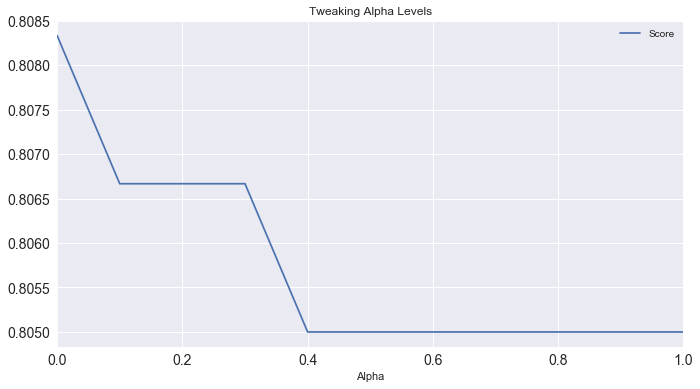

In [62]:
alpha_score.plot(x='Alpha', y='Score', kind='line', figsize=(10, 6), grid=True, fontsize=14,
                 title = "Tweaking Alpha Levels")

# Apply logistic regression 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create the classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Fit the classifier to the training data
logreg.fit(count_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(count_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(logreg.score(count_test, y_test))
print(logreg.score(count_train, y_train))

[[278  30]
 [ 49 243]]
              precision    recall  f1-score   support

    negative       0.85      0.90      0.88       308
    positive       0.89      0.83      0.86       292

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

0.8683333333333333
0.932761087267525


# Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

y = df['ratings'].values
X = df['cleantxt'].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

rf = RandomForestClassifier(n_estimators = 200, max_depth = 8, random_state = 42)
tfidf = TfidfVectorizer(stop_words='english', max_features = 200,
                       token_pattern = r'\b[^\d\W][^\d\W]+\b')

pipeline = make_pipeline(tfidf, rf)
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print('Accuracy score: ', metrics.accuracy_score(y_test, pred))

Accuracy score:  0.864


# KNeighbors Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


y = df['ratings'].values
X = df['cleantxt'].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
knn = KNeighborsClassifier()

tfidf = TfidfVectorizer(stop_words='english', max_features = 200,
                       token_pattern = r'\b[^\d\W][^\d\W]+\b')

pipeline = make_pipeline(tfidf, knn)
pipeline.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
pred = pipeline.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(pipeline.score(X_test, y_test))

[[214  48]
 [ 56 182]]
              precision    recall  f1-score   support

    negative       0.79      0.82      0.80       262
    positive       0.79      0.76      0.78       238

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500

0.792


# With this data and our goal in developing the classifying model, we do not favor precision or reall score but the accuracy score. As the above results, Logistics classifier give us the best accuracy, precision, and recall score.